In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
path = os.getcwd()
files = os.listdir(path)
filesxlsx = [f for f in files if f[-4:] == 'xlsx']
filesxlsx

['Rabi2-18-2025-15-2.xlsx',
 'Rabi2-18-2025-14-58.xlsx',
 'Rabi2-18-2025-14-59.xlsx',
 'Rabi2-18-2025-14-56.xlsx',
 'Rabi2-18-2025-14-54.xlsx',
 'Rabi2-18-2025-14-55.xlsx',
 'Rabi2-18-2025-15-0.xlsx',
 'Rabi2-18-2025-14-57.xlsx',
 'Rabi2-18-2025-14-53.xlsx',
 'Rabi2-18-2025-15-1.xlsx',
 'Rabi2-18-2025-15-3.xlsx']

In [3]:
prelimdf = pd.read_excel(filesxlsx[0], sheet_name=None)
xrange = len(prelimdf['data'].x)
ydata = np.zeros((xrange,len(filesxlsx)))

In [4]:
filenum = -1
for filepath in filesxlsx:
    filenum += 1
    df = pd.read_excel(filepath, sheet_name=None)
    for i, elem in enumerate(df['data'].y):
        ydata[i][filenum] = elem
        
ydata_ave = np.array([np.average(measurements) for measurements in ydata])*100
ydata_std = np.array([np.std(measurements) for measurements in ydata])
x_data = np.array(df['data'].x)/100

<ErrorbarContainer object of 3 artists>

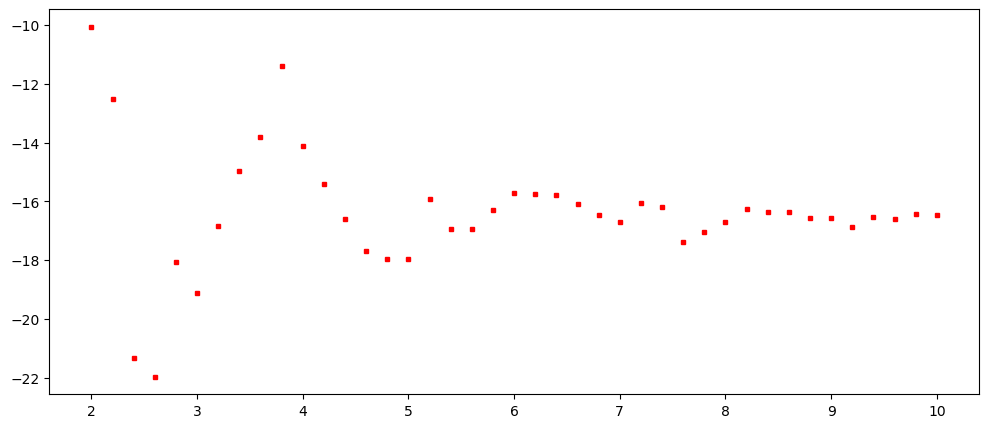

In [5]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='red',
         mec='red', ls="None", ms=3)

In [6]:
def fit(t, t_0, A, B, C, D, p, q, O):
    t = t + t_0
    return A*np.exp(-p*t)+np.exp(-q*t)*(B*np.cos(O*t) + C*np.sin(O*t) + D)
vectorfit = np.vectorize(fit)

def testfit(t, t_0, phi, A, B, T, O):
    return A*np.exp(-(t-t_0)/T)*np.sin(O*t+phi) + B
parameters, covariance = scipy.optimize.curve_fit(testfit, x_data[3:], ydata_ave[3:], p0 = [2, -0.4, 6.45, -16.09, 2.35, 2.24], method='lm')
                                                                                        # t_0, phi, A, B, T, O
for elem in parameters:
    print(elem, end=", ")

1.7710887517431975, -1.8747982977904718, 7.816570054142368, -16.392689645744124, 1.9164901028593062, 2.56423329346441, 

/tmp/ipykernel_19858/1221520483.py:7: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(t-t_0)/T)*np.sin(O*t+phi) + B


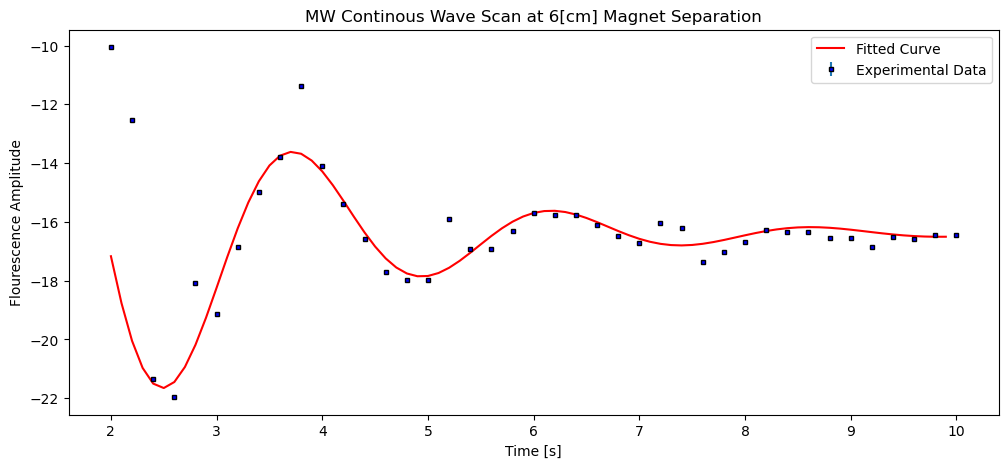

In [7]:
plt.figure(figsize=(12,5))

x_fit = np.arange(x_data[0], x_data[-1], 0.1)
y_fit = testfit(x_fit, *parameters)

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='blue',
         mec='black', ls="None", ms=3, label = 'Experimental Data')
plt.plot(x_fit, y_fit, 'red', label = 'Fitted Curve')
plt.xlabel("Time [s]")
plt.ylabel("Flourescence Amplitude")
plt.title("MW Continous Wave Scan at 6[cm] Magnet Separation")
plt.legend()

In [8]:
print("The generalized rabi frequency, which equals the rabi frequency (assuming detuning = 0) is", parameters[-1])

The generalized rabi frequency, which equals the rabi frequency (assuming detuning = 0) is 2.56423329346441


# Parameter Adjustments

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def update_plot(t_0, phi, A, B, T, O):
    x_fit = np.arange(x_data[0], x_data[-1], 0.01)
    y_fit = testfit(x_fit, t_0, phi, A, B, T, O)
    
    plt.figure(figsize=(12, 5))
    plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='blue',
                 mec='black', ls="None", ms=3, label='Experimental Data')
    plt.plot(x_fit, y_fit, 'red', label='Fitted Curve')
    plt.hlines(B, 2, 10, colors='black', linestyles='dashed')
    plt.legend()
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Interactive Curve Fitting")
    plt.show()

interact(update_plot, 
         t_0=FloatSlider(min=0, max=4, step=0.001, value=2),
         phi=FloatSlider(min=-1, max=1, step=0.001, value=-0.4),
         A=FloatSlider(min=0, max=10, step=0.001, value=8.9),
         B=FloatSlider(min=-20, max=0, step=0.001, value=-14.3),
         T=FloatSlider(min=0, max=5, step=0.001, value=5),
         O=FloatSlider(min=0.01, max=3, step=0.001, value=1.65));

interactive(children=(FloatSlider(value=2.0, description='t_0', max=4.0, step=0.001), FloatSlider(value=-0.4, …